# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [5]:
import seaborn as sns

In [6]:
df["charges"].quantile(q=0.5)

9382.033

In [7]:
df["charges"].quantile(q=0.75)-df["charges"].quantile(q=0.25)

11899.625365

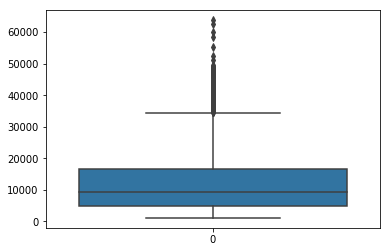

In [8]:
sns.boxplot(data=df["charges"])
#I see a lot of outliers in the charges which is my dependent variable

In [9]:
#Checking the outliers in the bmi variable
import numpy as np
outliers_bmi = df[(np.abs(df.bmi - df.bmi.mean()) > (3*df.bmi.std()))] 

In [10]:
outliers_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [11]:
outliers_charges=df[(np.abs(df.charges - df.charges.mean()) > (2*df.charges.std()))]

In [12]:
outliers_charges.shape

(107, 7)

In [13]:
outliers_charges.shape

(107, 7)

In [14]:
inliers_charges = df[(np.abs(df.charges - df.charges.mean()) < (2*df.bmi.std()))] 

In [15]:
inliers_charges.shape

(0, 7)

In [16]:
df["charges"].shape

(1338,)

In [17]:
df.head(n=1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


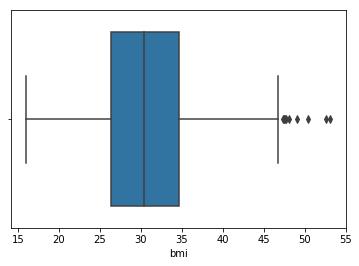

In [18]:
sns.boxplot(df["bmi"])

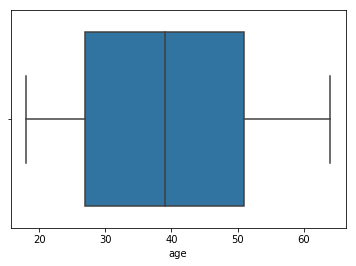

In [19]:
sns.boxplot(df["age"])
#I do not see any outliers in the age variable

In [20]:
#I do a boxplot to check the distributions of the relationship for charges, I can see that we have a 
#number of outliers in the data. The median charges are 9382, while the interquartile range is
#11899. I see that even after a maximum of 35000, we have a lot of outliers in the data.
#Also another observation from the data is that the outliers are cluttered in a fashion as to form
#a small gaussian of their own, which is a problem that would reflect while making the model run.

In [21]:
df.shape

(1338, 7)

In [22]:
#Applying the one hot encoding method, which will convert the categorical variables into a numerical
#number for applying the regression techniques
df = pd.get_dummies(df, columns=['sex','region','smoker'])

# Question 3 - Explore the relationship between variables. 

In [23]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


You can use corr() function or any other function to do the same.

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


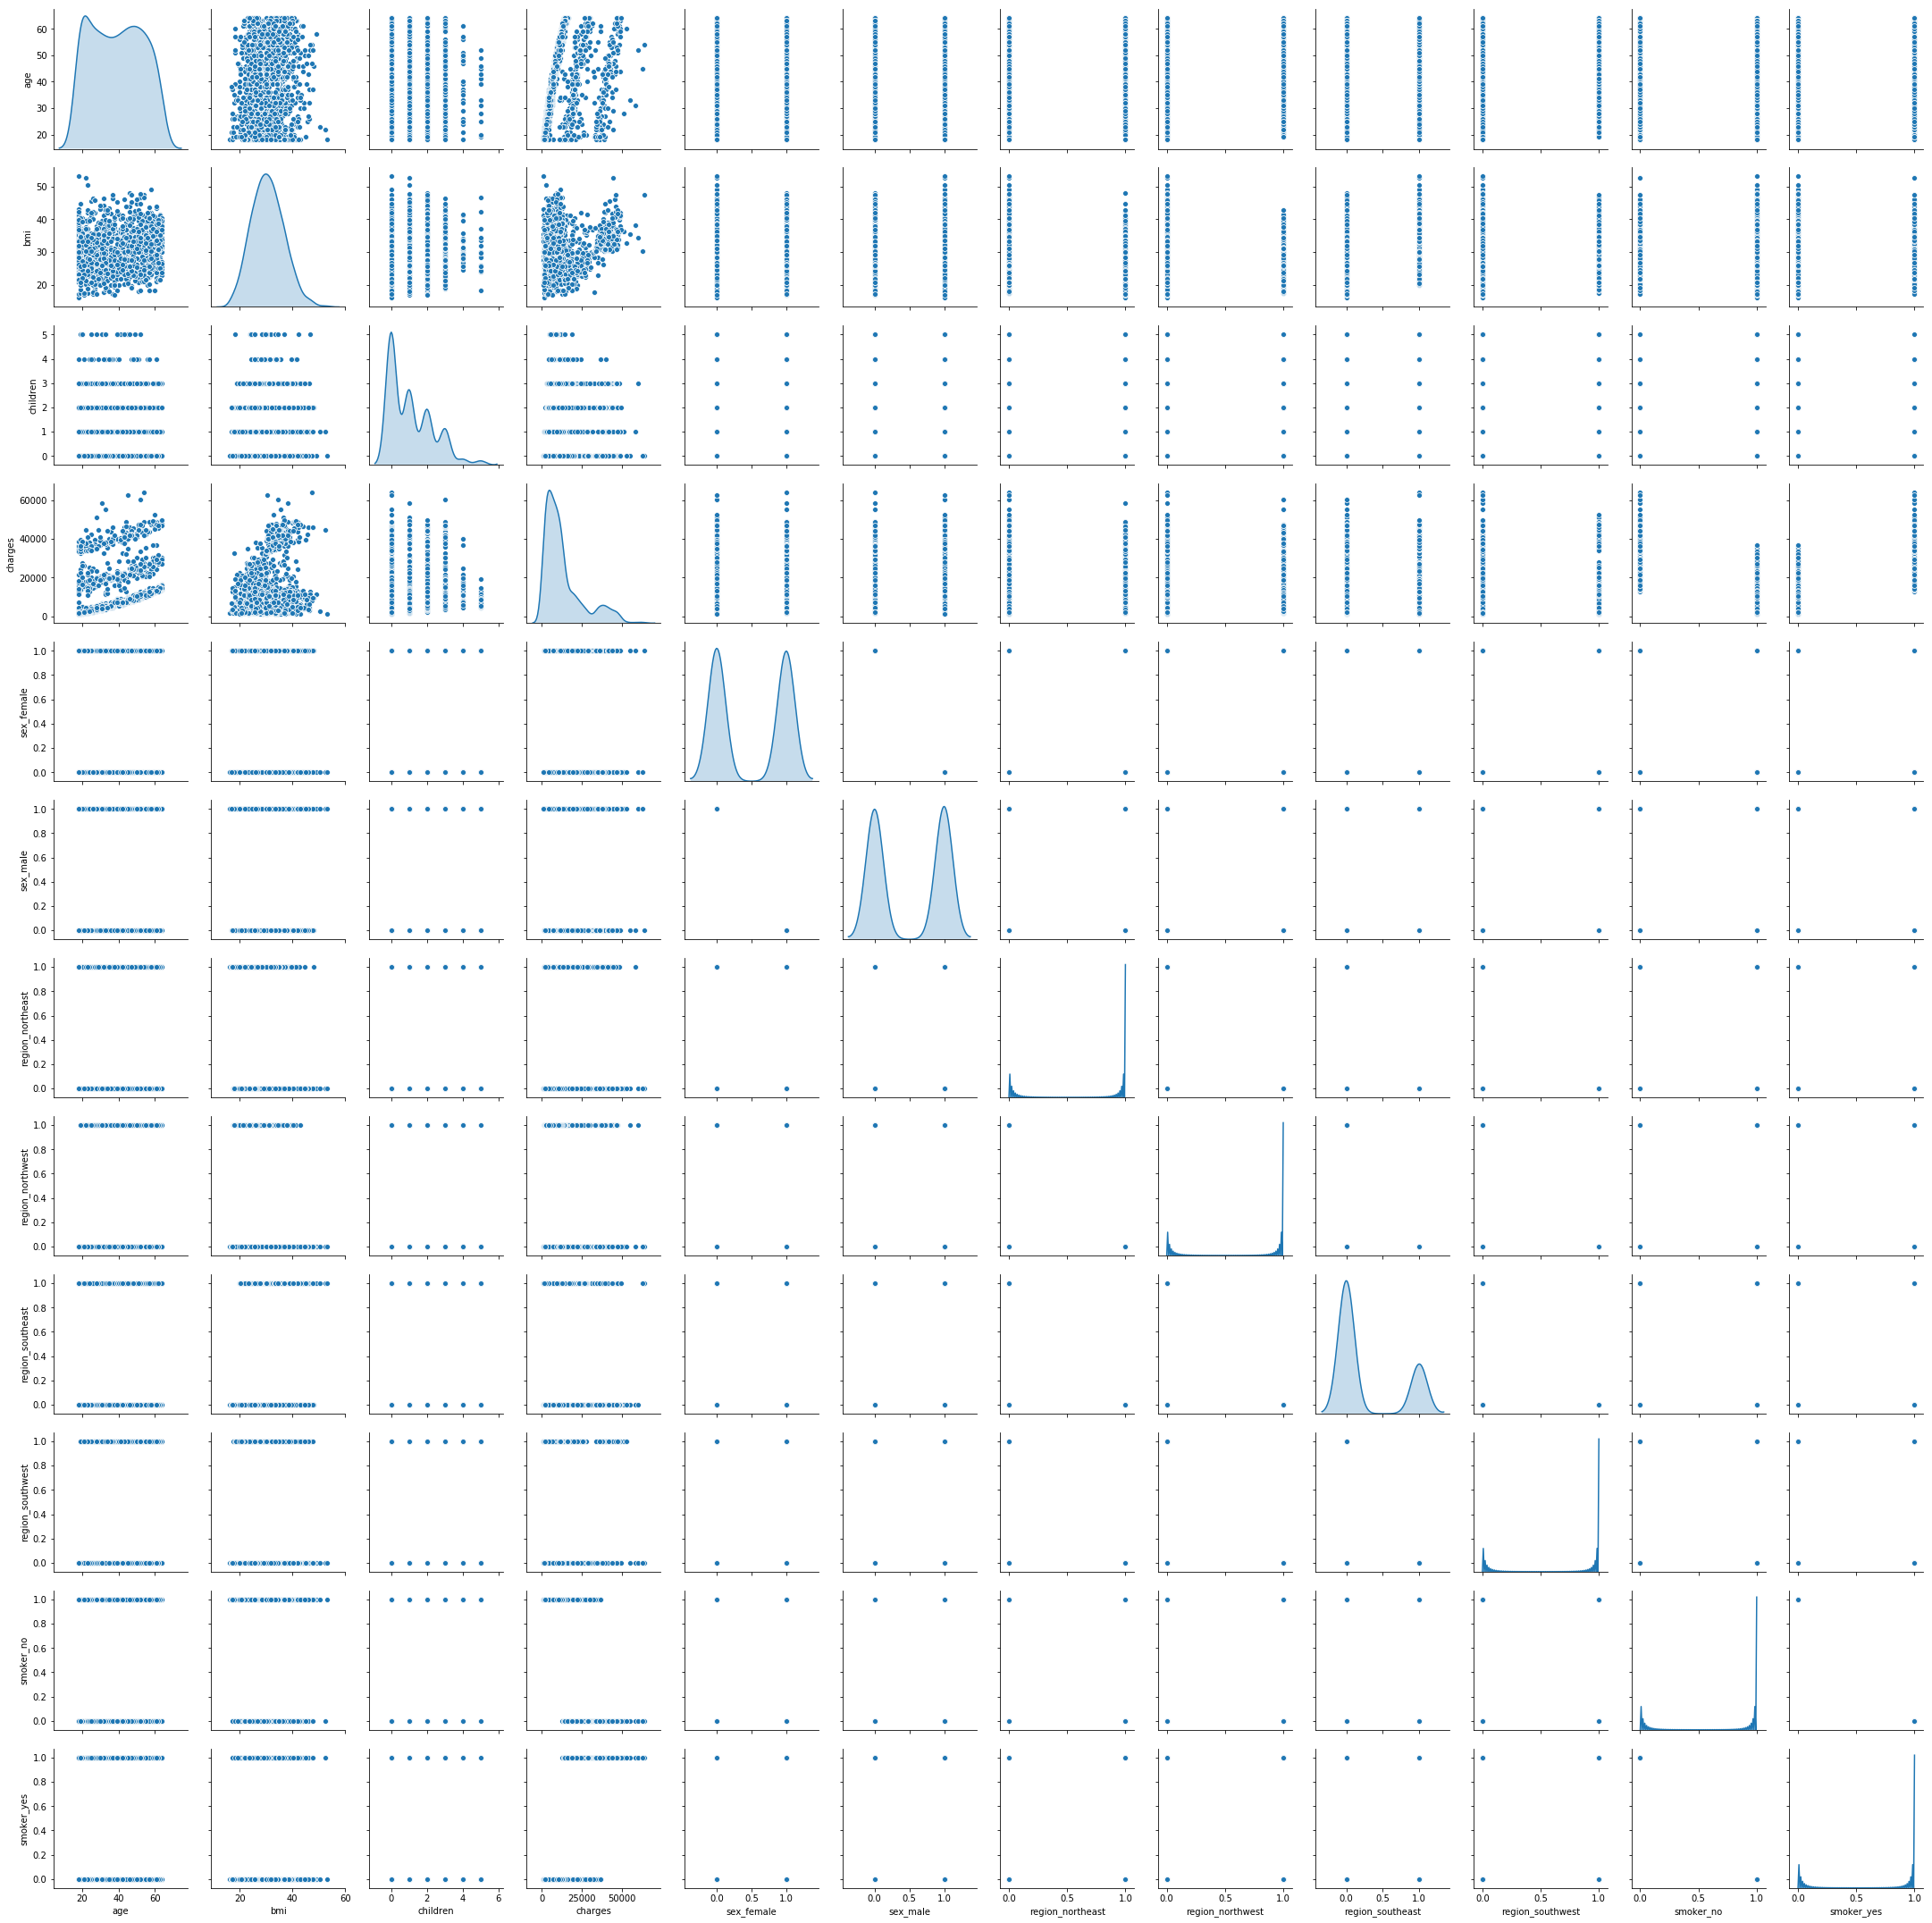

In [24]:
sns.pairplot(df,diag_kind='kde')

In [25]:
#Checking the correlation with all the variables, even the ones in which we have used the one hot encoding
#technique
df.corr()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945


In [26]:
#The observation that I see from the pairplot and the correlation matrix is that
#age is having the strongest correlation with the charges followed by bmi, children has 
#the weakest correlation and is this is expected to be of no use in the model.
#Another strong correlation that I see in the data is of the smoker, which has a very high correlation
#with the charges and thus this variable has to be there in the model to have a very good prediction of the
#y against x

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [27]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [28]:
x_ind=df[["age","bmi","smoker_yes","smoker_no"]]

In [29]:
y_dep=df[["charges"]]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Splitting the data in the 70:30 ratio:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.3)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [32]:
#Again, now executing the new analyis with this dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_female,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
region_northeast,1338.0,0.242152,0.428546,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


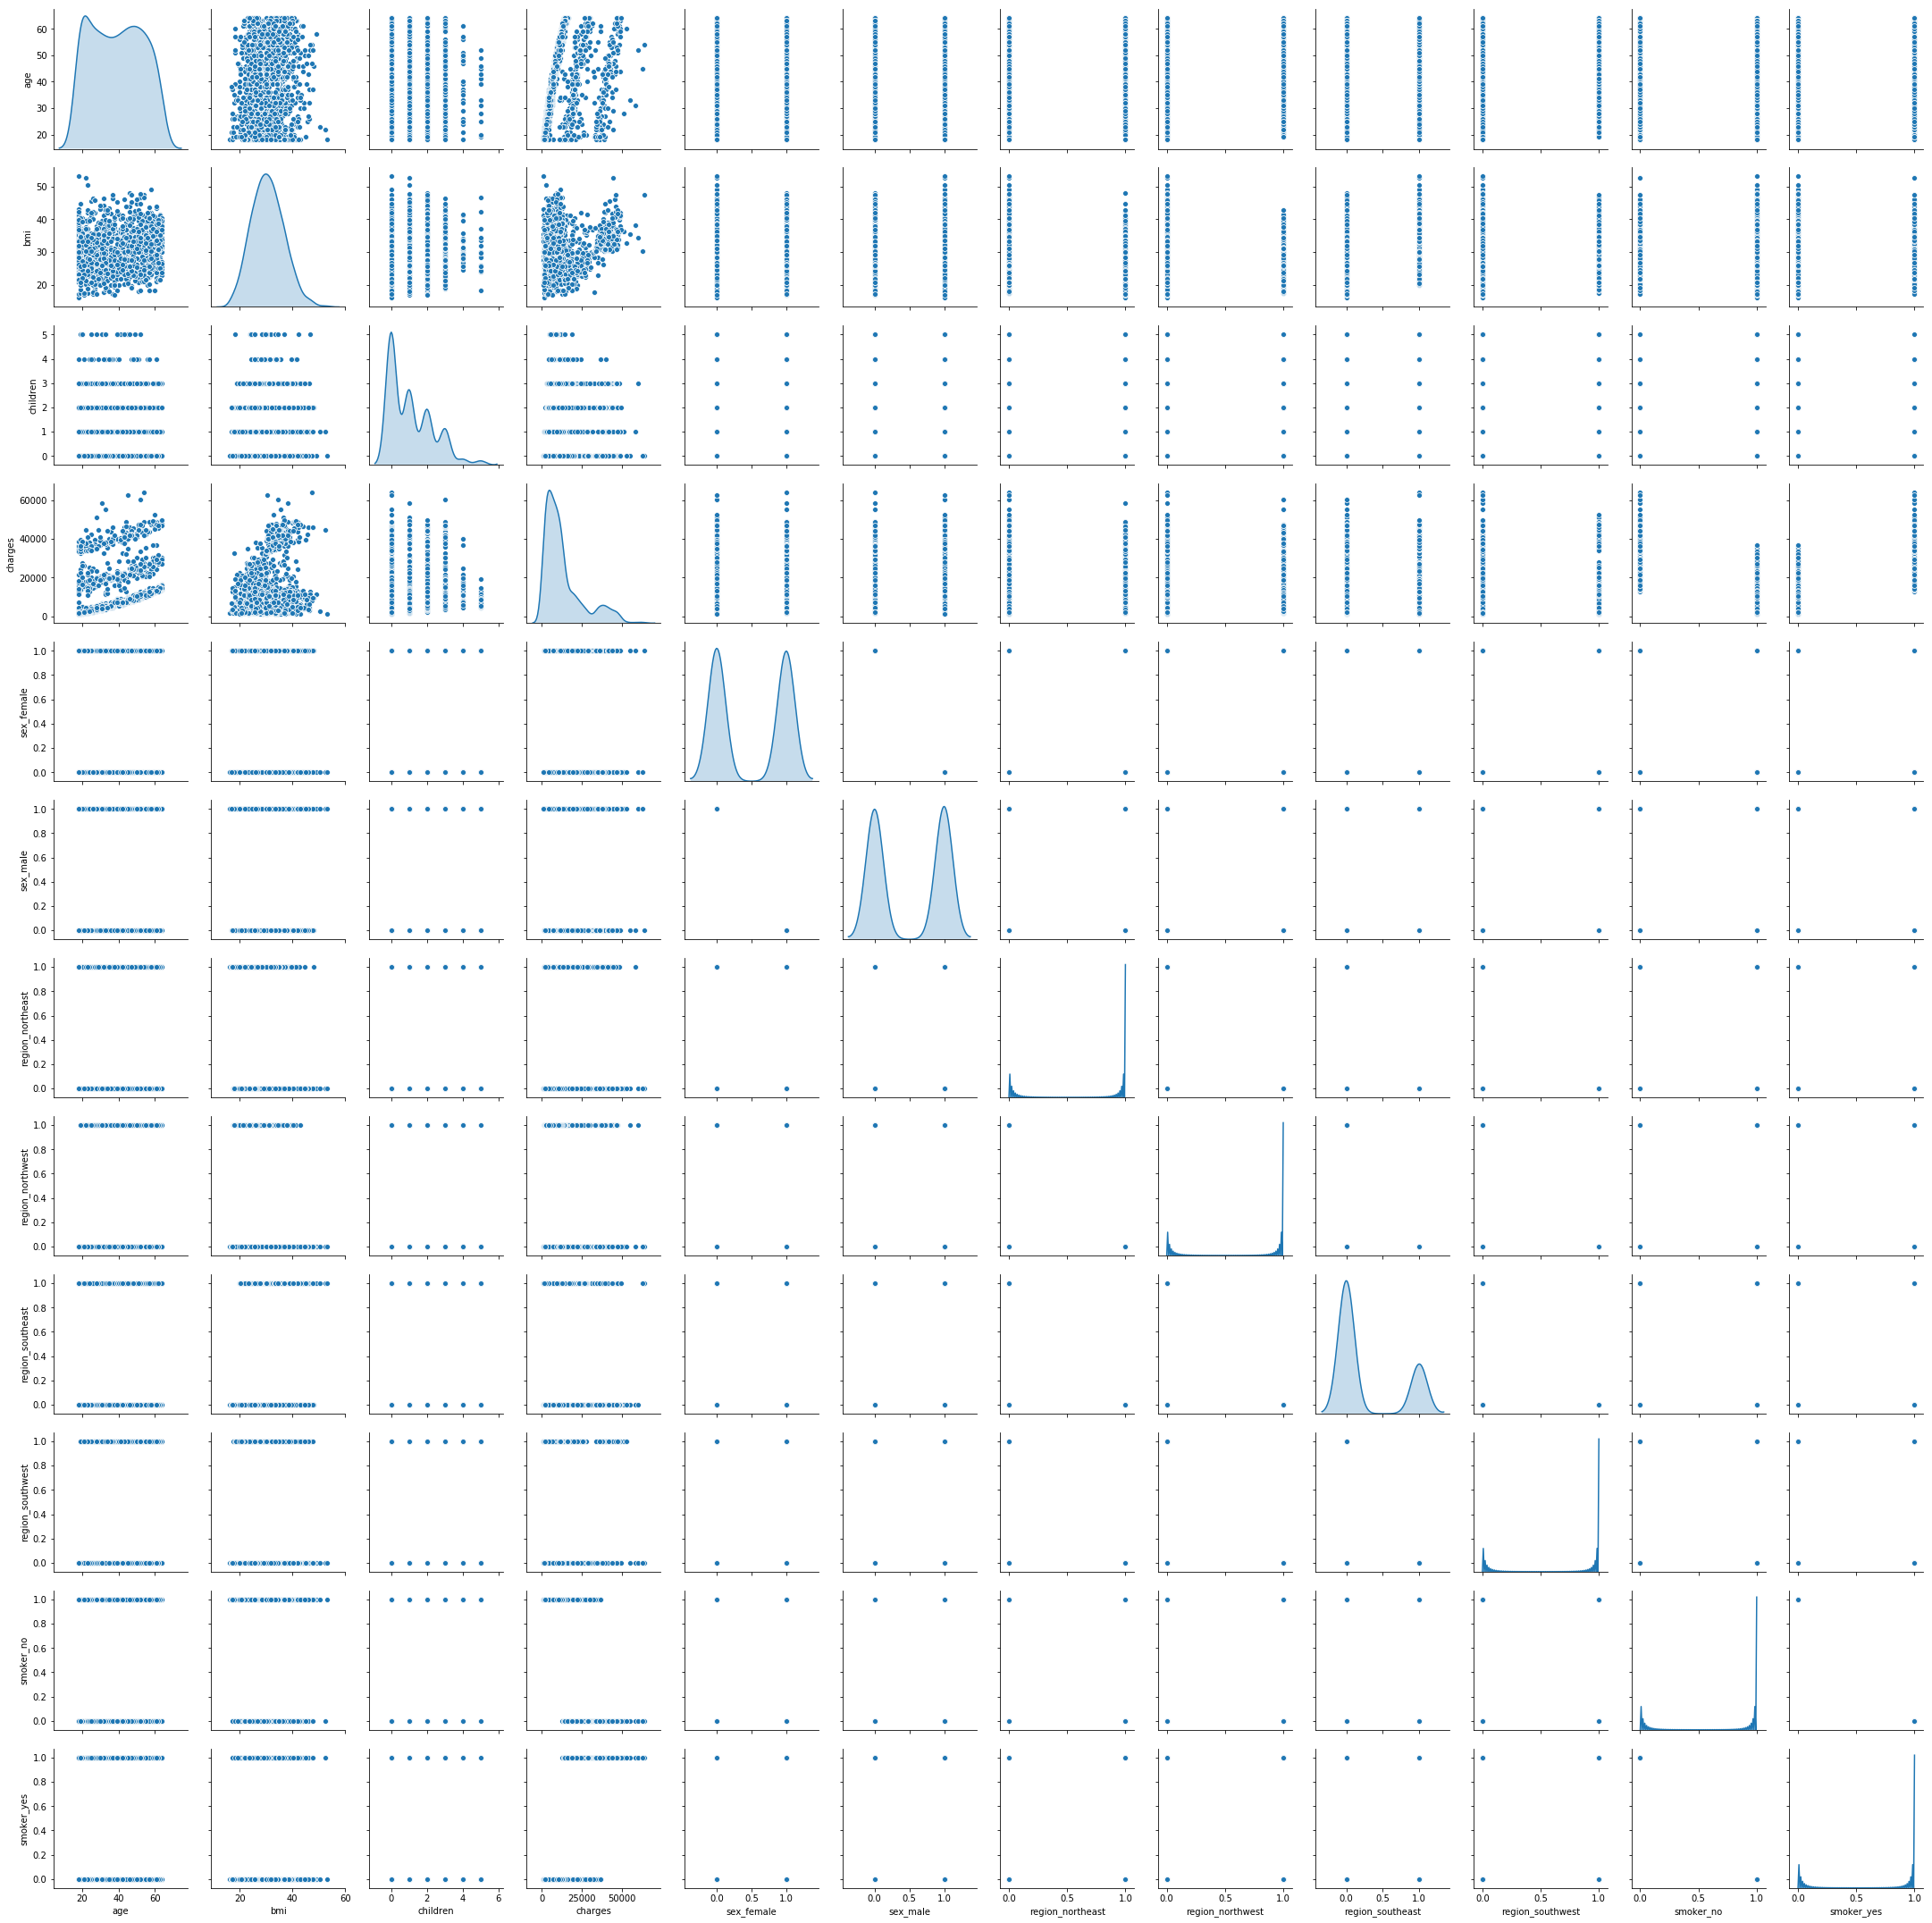

In [33]:
sns.pairplot(df,diag_kind='kde')

# Question 6 - Train your model.

In [34]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [35]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
smoker_no             uint8
smoker_yes            uint8
dtype: object

In [36]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 265.2044977288411
The coefficient for bmi is 325.92943572533034
The coefficient for smoker_yes is 11824.378564997993
The coefficient for smoker_no is -11824.37856499799


In [37]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -274.52229748931495


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [38]:
regression_model.score(x_train, y_train)

0.762553513594983

In [39]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
regression_model.score(x_test, y_test)

0.7120284004308706

In [40]:
#We that we are getting a model accuracy score of a 75%, just by taking the highly correlated variables
#in our model. I tried to load the model without the smoker column which decreased the accuracy score
#of my model to just 11%. This is having a huge impact on the model performance.

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [41]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [43]:
#Checking the distribution of the datset, seeing which columns are null and if there are no non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [44]:
df["class"]=df["class"].astype('category')

In [45]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [46]:
x_ind=df.drop("class",axis=1)

In [47]:
x_ind

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [48]:
y_dep=df[["class"]]

In [49]:
y_dep

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\rachi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


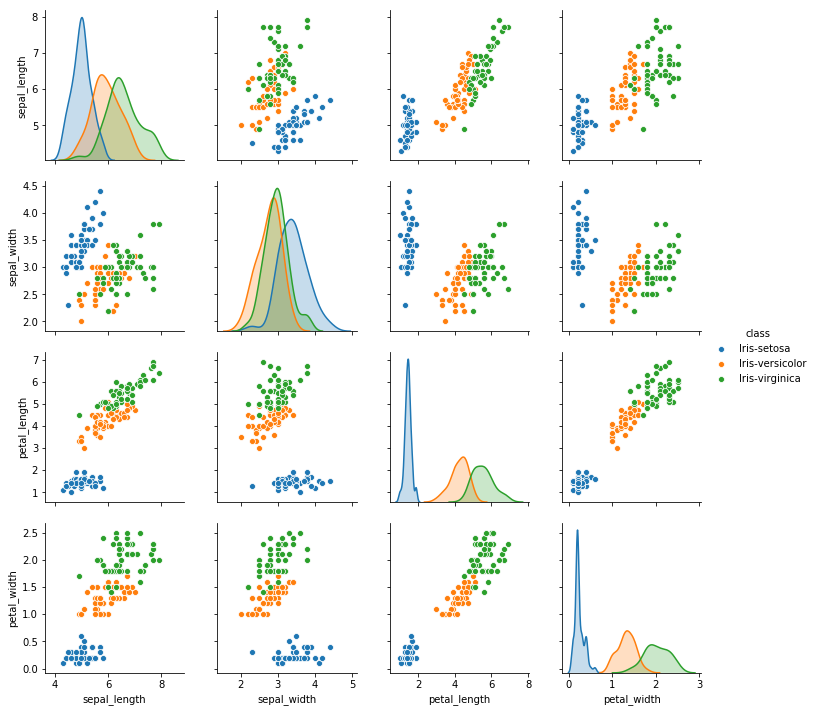

In [50]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='class')
#The pairplot below depicts that there is a clear separation between the classes, which is indeed
#a very positive point for a classification model. Also we need that the central values in 
#all these classes do not overlap much thus we can say that there would be no overlapping when
#the model will be running against it, but I sespect the correlation  between variables,
#which I will check in the below line by using the corr function


In [51]:
df.corr()
#I can see that the petal_length and the petal_width are strongly correlated to each other and 
#so are the sepal_length and the petal_length, while my Naive Bayes classifier assumes that the 
#all the variables are independent of each other and does not affect each other in model, which is a 
#situation which we rarely see in the real time problems

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Question 11- Do Feature Scaling 

In [52]:
from scipy.stats import zscore

In [53]:
x_ind_z=x_ind.apply(zscore)

In [54]:
x_ind_z

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [55]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

## Question 12- Train and Fit NaiveBayes Model

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind_z,y_dep)

In [57]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(x_train, y_train)

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [58]:
model.score(x_train,y_train)

0.9553571428571429

In [64]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [65]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        13

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.97      0.98        38
   weighted avg       0.98      0.97      0.97        38

[[ 8  0  0]
 [ 0 17  0]
 [ 0  1 12]]


In [ ]:
#By the confusion matrix, we come to see that the model is pretty accurate, it correctly predicts all the
#records of the first two classes but makes one classification error in the third class

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [69]:
Rf_model.fit(x_train,y_train)

C:\Users\rachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
y_predict_Rf=Rf_model.predict(x_test)

In [72]:
Rf_acc=metrics.accuracy_score(y_test,y_predict_Rf)
print(Rf_acc)

0.9736842105263158


In [ ]:
#With the random forest algorithm, we are able to get a 97% accuracy level in our model

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(x_train,y_train)

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [74]:
y_predict_gb=gbcl.predict(x_test)

In [75]:
metrics.accuracy_score(y_test,y_predict_gb)

0.9736842105263158

In [ ]:
#We see that with the random forest and the gradient boost classifier, we are achieving the same 
#accuracy level